<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r4_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r4-good.csv?token=AKVFSOBN6QLPGMV6YD36YJS6X2LYU"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r4-mal.csv?token=AKVFSODCZGBW4ENI53G3CCC6X2LY2"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl)

Characteristics of Dataset

In [7]:
dfg

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,113,1,3,1,1,4,3,9,0,0,24,8,1,2,1,0.50,8,6,1,6,6,36,3,1,4,4,3,27,9,1
1,185,3,1,4,1,1,5,17,29,13,0,0,1,4,3,0.75,17,5,2,6,10,60,3,4,4,4,20,85,100,1
2,186,3,1,4,2,2,5,17,29,13,0,0,1,4,3,0.75,18,4,3,6,12,72,3,8,16,16,20,85,100,1
3,187,3,1,4,3,2,5,17,29,13,0,0,1,4,3,0.75,19,3,4,6,12,72,3,12,24,24,20,85,100,1
4,188,3,1,4,4,2,5,17,29,13,0,0,1,4,3,0.75,20,2,5,6,10,60,3,16,32,32,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22873,3250553,3,1,4,2,2,5,17,30,14,0,0,10017,5,4,0.80,21,1,1,1,1,1,3,8,16,160272,20,85,100,1
22874,3250554,3,1,4,3,2,5,17,30,14,0,0,10017,5,4,0.80,22,1,1,1,1,1,3,12,24,240408,20,85,100,1
22875,3250555,3,1,4,4,2,5,17,30,14,0,0,10017,5,4,0.80,23,1,1,1,1,1,3,16,32,320544,20,85,100,1
22876,3250559,3,1,4,5,3,5,17,30,14,0,0,10017,5,4,0.80,27,1,1,1,1,1,3,20,60,601020,20,85,100,1


In [8]:
dfm

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,109,1,3,1,1,4,3,9,1,1,24,8,2,3,2,0.666667,12,2,1,2,2,4,3,1,4,8,3,27,9,0
1,130,1,3,1,1,4,3,9,0,0,24,8,3,2,1,0.500000,8,1,2,2,2,4,3,1,4,12,3,27,9,0
2,202,3,1,4,1,1,5,17,29,13,0,0,3,4,3,0.750000,16,5,1,5,5,25,3,4,4,12,20,85,100,0
3,203,3,1,4,2,2,5,17,29,13,0,0,3,4,3,0.750000,17,4,2,5,8,40,3,8,16,48,20,85,100,0
4,204,3,1,4,3,2,5,17,29,13,0,0,3,4,3,0.750000,18,3,3,5,9,45,3,12,24,72,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15574,2009879,3,1,4,1,1,5,17,30,14,0,0,11071,5,4,0.800000,21,1,1,1,1,1,3,4,4,44284,20,85,100,0
15575,2009880,3,1,4,2,2,5,17,30,14,0,0,11071,5,4,0.800000,22,1,1,1,1,1,3,8,16,177136,20,85,100,0
15576,2009881,3,1,4,3,2,5,17,30,14,0,0,11071,5,4,0.800000,23,1,1,1,1,1,3,12,24,265704,20,85,100,0
15577,2009882,3,1,4,4,2,5,17,30,14,0,0,11071,5,4,0.800000,24,1,1,1,1,1,3,16,32,354272,20,85,100,0


In [0]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [10]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.sort_values('timestamp')
df.to_csv('wat-r1-model.csv',index=False)

In [12]:
df = pd.read_csv("wat-r1-model.csv")
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,109,1,3,1,1,4,3,9,1,1,24,8,2,3,2,0.666667,12,2,1,2,2,4,3,1,4,8,3,27,9,0
1,113,1,3,1,1,4,3,9,0,0,24,8,1,2,1,0.500000,8,6,1,6,6,36,3,1,4,4,3,27,9,1
2,130,1,3,1,1,4,3,9,0,0,24,8,3,2,1,0.500000,8,1,2,2,2,4,3,1,4,12,3,27,9,0
3,185,3,1,4,1,1,5,17,29,13,0,0,1,4,3,0.750000,17,5,2,6,10,60,3,4,4,4,20,85,100,1
4,186,3,1,4,2,2,5,17,29,13,0,0,1,4,3,0.750000,18,4,3,6,12,72,3,8,16,16,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38452,3250553,3,1,4,2,2,5,17,30,14,0,0,10017,5,4,0.800000,21,1,1,1,1,1,3,8,16,160272,20,85,100,1
38453,3250554,3,1,4,3,2,5,17,30,14,0,0,10017,5,4,0.800000,22,1,1,1,1,1,3,12,24,240408,20,85,100,1
38454,3250555,3,1,4,4,2,5,17,30,14,0,0,10017,5,4,0.800000,23,1,1,1,1,1,3,16,32,320544,20,85,100,1
38455,3250559,3,1,4,5,3,5,17,30,14,0,0,10017,5,4,0.800000,27,1,1,1,1,1,3,20,60,601020,20,85,100,1


In [13]:
df.corr()

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
timestamp,1.000000,0.041784,0.003210,0.030205,0.001149,-0.001719,0.017237,0.012019,0.016958,0.026815,-0.027322,0.004116,0.846235,0.009210,0.015847,0.002415,-0.004762,-0.402016,-0.402010,-0.487091,-0.364341,-0.267854,0.072631,0.002081,0.006353,0.482589,0.044087,0.015170,0.031880,0.411779
outport,0.041784,1.000000,-0.794787,0.129376,0.016394,-0.024641,0.693122,0.699346,0.929322,0.904443,-0.901774,-0.760908,-0.029499,0.739544,0.624208,0.064837,-0.245177,-0.114035,-0.059425,-0.105085,-0.120430,-0.121465,0.557954,-0.060554,-0.006179,-0.027241,0.750210,0.697572,0.817090,0.150077
inport,0.003210,-0.794787,1.000000,-0.170521,-0.027553,0.041412,-0.471020,-0.533943,-0.839245,-0.689212,0.682438,0.774740,0.045987,-0.504688,-0.255434,0.264401,0.258970,0.023229,-0.077828,-0.033077,-0.024630,-0.014582,0.025865,-0.027850,-0.043590,0.000695,-0.587649,-0.497828,-0.590648,-0.077904
cache_coherence_type,0.030205,0.129376,-0.170521,1.000000,-0.087662,0.131757,-0.415386,-0.433788,0.042710,-0.068978,-0.084827,-0.115193,0.035377,-0.113694,-0.185755,-0.241729,-0.436954,-0.007280,-0.028625,-0.021752,0.000136,0.012960,0.044759,0.185986,0.266517,0.204125,0.565757,-0.423998,-0.028097,0.007298
flit_id,0.001149,0.016394,-0.027553,-0.087662,1.000000,-0.037063,0.283096,0.278515,0.025421,0.091420,0.006881,0.012406,-0.000425,0.098885,0.072996,0.041456,0.506678,-0.015139,0.079403,0.038932,0.038314,0.023841,-0.020658,0.943261,0.851207,0.599351,0.174017,0.282027,0.273542,0.005478
flit_type,-0.001719,-0.024641,0.041412,0.131757,-0.037063,1.000000,-0.425498,-0.418613,-0.038209,-0.137405,-0.010342,-0.018646,0.000639,-0.148625,-0.109715,-0.062309,0.283612,-0.090399,0.066967,-0.014195,-0.018303,-0.008156,0.031049,-0.009450,0.308818,0.221064,-0.261550,-0.423892,-0.411138,-0.008233
vnet,0.017237,0.693122,-0.471020,-0.415386,0.283096,-0.425498,1.000000,0.988499,0.739827,0.850099,-0.739829,-0.603921,-0.046195,0.680539,0.746343,0.435065,-0.014851,-0.049024,-0.067254,-0.070443,-0.095767,-0.105805,0.389644,0.057069,-0.046162,-0.062934,0.515060,0.998121,0.920957,0.124790
vc,0.012019,0.699346,-0.533943,-0.433788,0.278515,-0.418613,0.988499,1.000000,0.750837,0.837767,-0.726291,-0.618151,-0.048446,0.667307,0.693873,0.354940,-0.008977,-0.040540,-0.041569,-0.049743,-0.073837,-0.085553,0.327244,0.056567,-0.049663,-0.067450,0.487295,0.995908,0.900436,0.117323
src_ni,0.016958,0.929322,-0.839245,0.042710,0.025421,-0.038209,0.739827,0.750837,1.000000,0.947217,-0.929473,-0.886176,-0.050239,0.748385,0.691485,0.204782,-0.230269,-0.078355,-0.035633,-0.069056,-0.084162,-0.087066,0.336687,-0.070315,-0.026222,-0.052298,0.710881,0.746346,0.831289,0.131634
src_router,0.026815,0.904443,-0.689212,-0.068978,0.091420,-0.137405,0.850099,0.837767,0.947217,1.000000,-0.935668,-0.812922,-0.042310,0.819418,0.840900,0.399295,-0.124028,-0.081868,-0.084380,-0.100716,-0.117971,-0.119660,0.456114,-0.053278,-0.037821,-0.056184,0.705597,0.847466,0.904622,0.140274


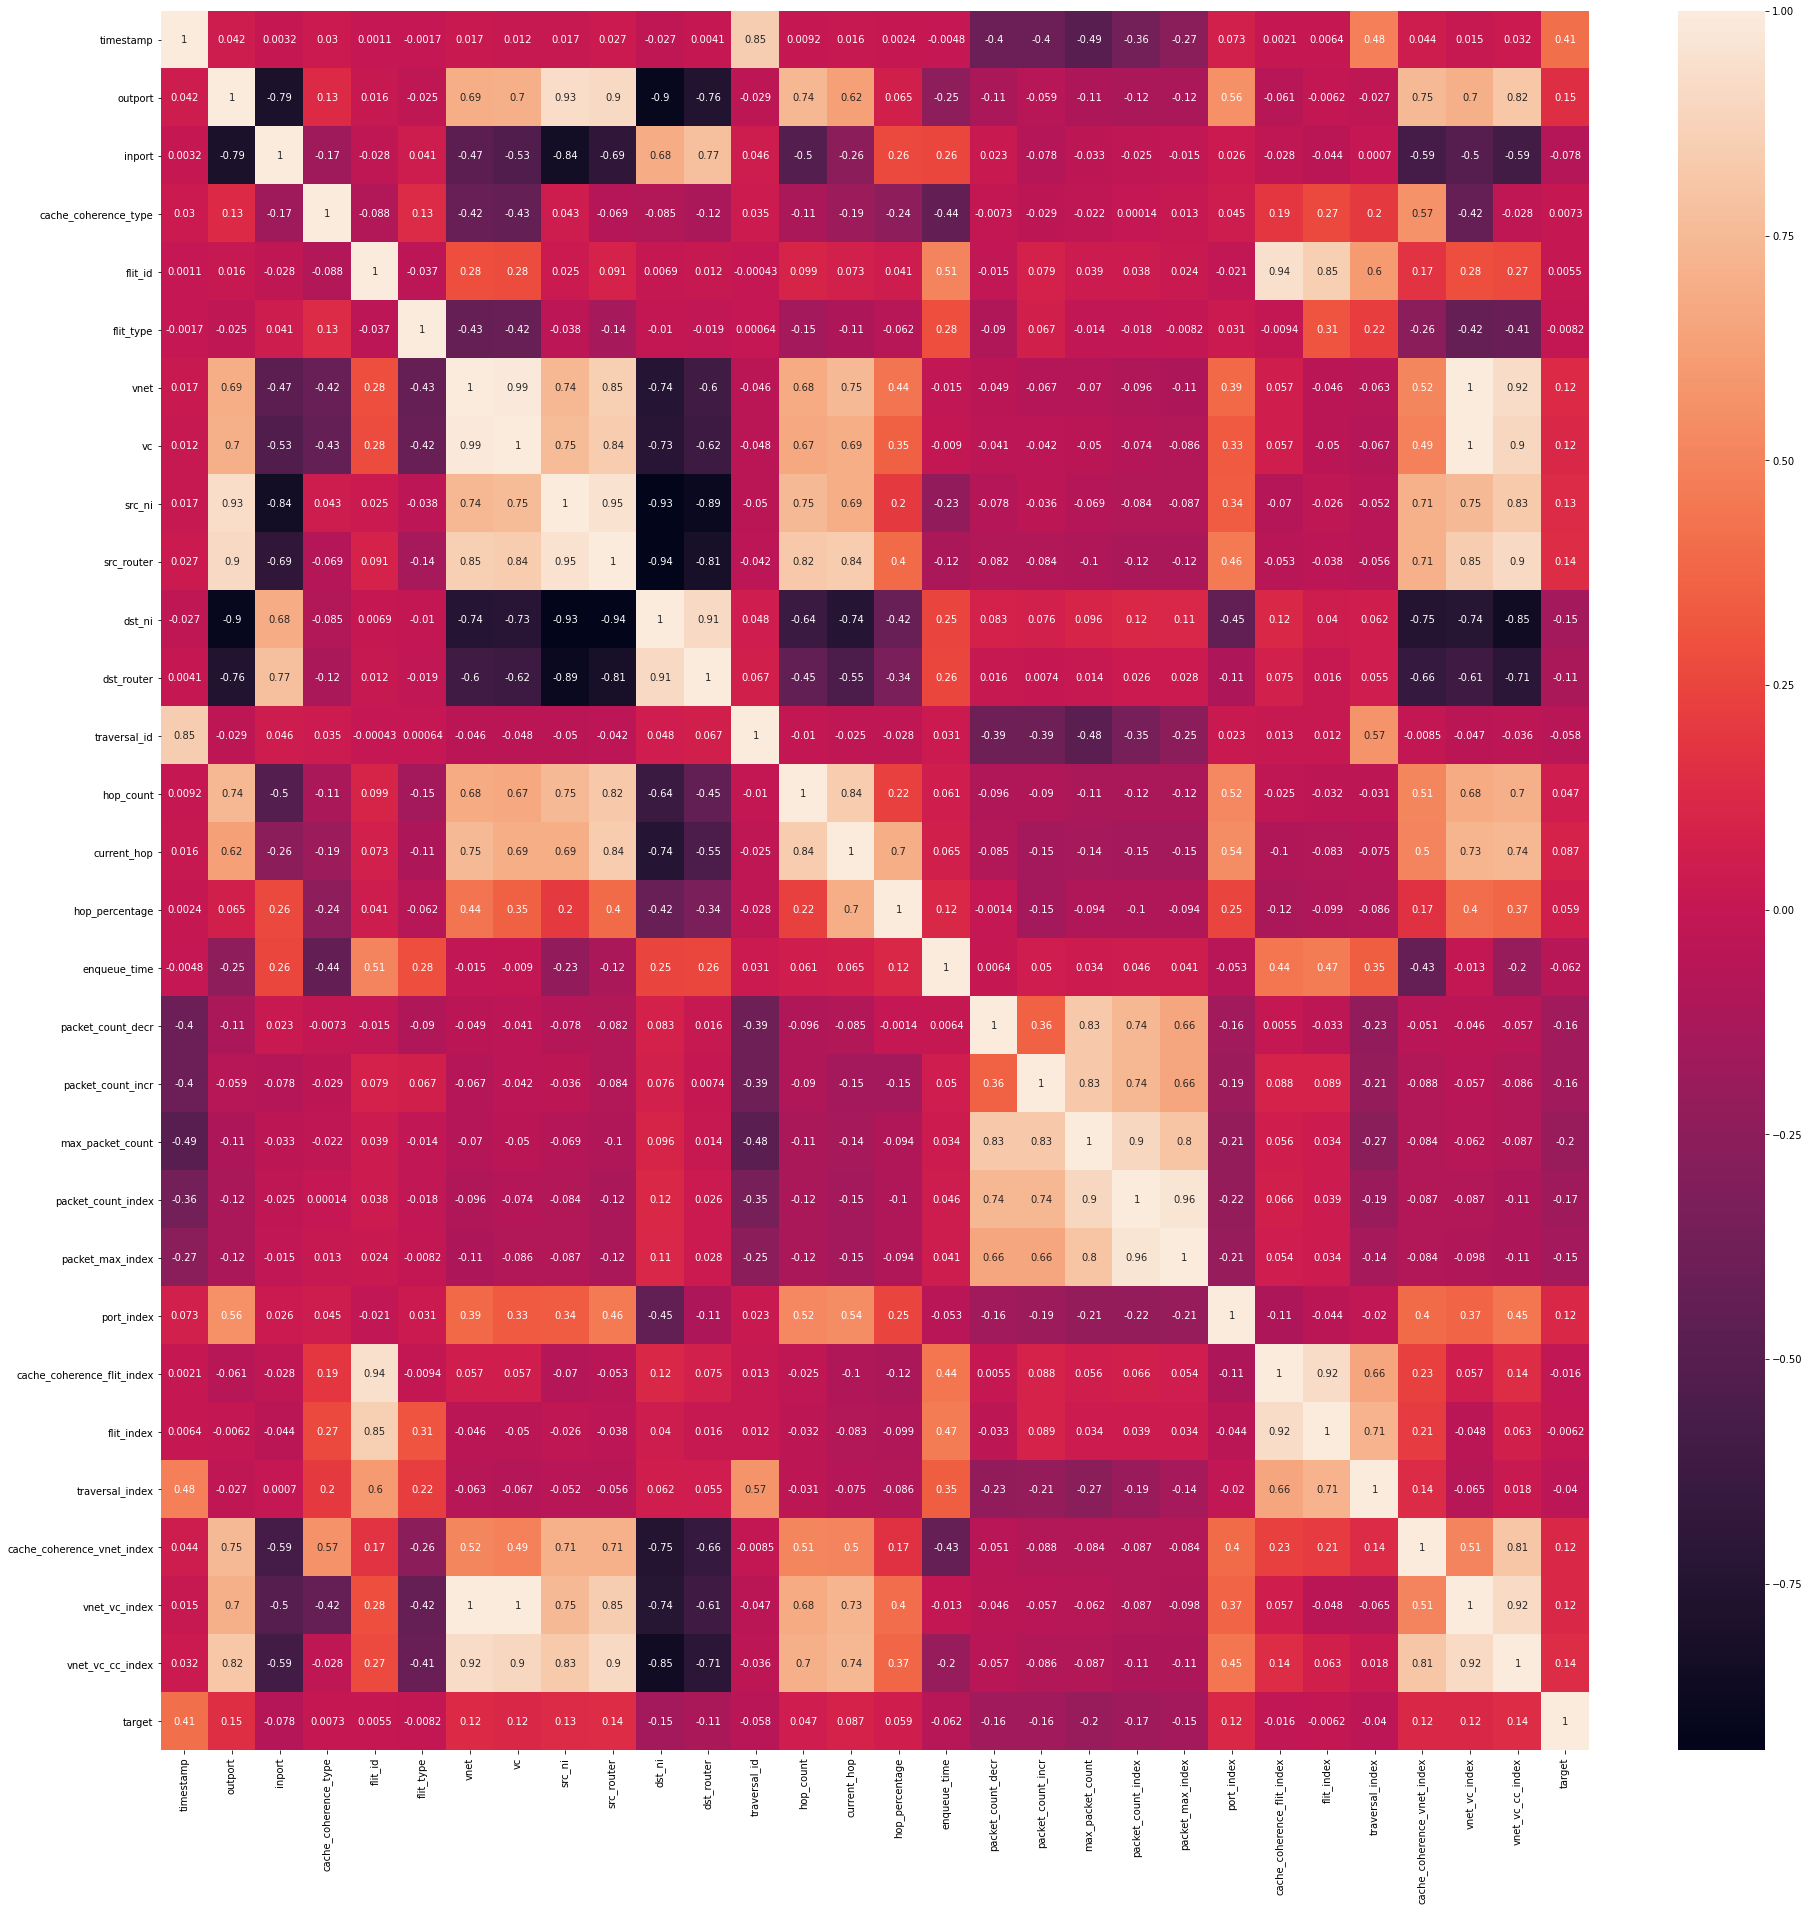

In [14]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [15]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1,3,1,1,4,3,9,24,8,2,3,2,0.666667,12,2,1,2,2,4,3,1,4,8,3,27,9
1,1,3,1,1,4,3,9,24,8,1,2,1,0.500000,8,6,1,6,6,36,3,1,4,4,3,27,9
2,1,3,1,1,4,3,9,24,8,3,2,1,0.500000,8,1,2,2,2,4,3,1,4,12,3,27,9
3,3,1,4,1,1,5,17,0,0,1,4,3,0.750000,17,5,2,6,10,60,3,4,4,4,20,85,100
4,3,1,4,2,2,5,17,0,0,1,4,3,0.750000,18,4,3,6,12,72,3,8,16,16,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38452,3,1,4,2,2,5,17,0,0,10017,5,4,0.800000,21,1,1,1,1,1,3,8,16,160272,20,85,100
38453,3,1,4,3,2,5,17,0,0,10017,5,4,0.800000,22,1,1,1,1,1,3,12,24,240408,20,85,100
38454,3,1,4,4,2,5,17,0,0,10017,5,4,0.800000,23,1,1,1,1,1,3,16,32,320544,20,85,100
38455,3,1,4,5,3,5,17,0,0,10017,5,4,0.800000,27,1,1,1,1,1,3,20,60,601020,20,85,100


In [16]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.333333,1.000000,0.0,0.00,1.000000,0.0,0.0,0.857143,0.666667,0.000090,0.4,0.4,0.666667,0.142857,0.05,0.00,0.05,0.008333,0.001181,0.5,0.000000,0.000000,0.000004,0.000000,0.0,0.000000
1,0.333333,1.000000,0.0,0.00,1.000000,0.0,0.0,0.857143,0.666667,0.000000,0.2,0.2,0.500000,0.071429,0.25,0.00,0.25,0.041667,0.013780,0.5,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.333333,1.000000,0.0,0.00,1.000000,0.0,0.0,0.857143,0.666667,0.000181,0.2,0.2,0.500000,0.071429,0.00,0.05,0.05,0.008333,0.001181,0.5,0.000000,0.000000,0.000008,0.000000,0.0,0.000000
3,1.000000,0.333333,0.5,0.00,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.6,0.6,0.750000,0.232143,0.20,0.05,0.25,0.075000,0.023228,0.5,0.103448,0.000000,0.000000,0.944444,1.0,1.000000
4,1.000000,0.333333,0.5,0.25,0.333333,1.0,1.0,0.000000,0.000000,0.000000,0.6,0.6,0.750000,0.250000,0.15,0.10,0.25,0.091667,0.027953,0.5,0.241379,0.139535,0.000012,0.944444,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38452,1.000000,0.333333,0.5,0.25,0.333333,1.0,1.0,0.000000,0.000000,0.904788,0.8,0.8,0.800000,0.303571,0.00,0.00,0.00,0.000000,0.000000,0.5,0.241379,0.139535,0.161301,0.944444,1.0,1.000000
38453,1.000000,0.333333,0.5,0.50,0.333333,1.0,1.0,0.000000,0.000000,0.904788,0.8,0.8,0.800000,0.321429,0.00,0.00,0.00,0.000000,0.000000,0.5,0.379310,0.232558,0.241953,0.944444,1.0,1.000000
38454,1.000000,0.333333,0.5,0.75,0.333333,1.0,1.0,0.000000,0.000000,0.904788,0.8,0.8,0.800000,0.339286,0.00,0.00,0.00,0.000000,0.000000,0.5,0.517241,0.325581,0.322606,0.944444,1.0,1.000000
38455,1.000000,0.333333,0.5,1.00,0.666667,1.0,1.0,0.000000,0.000000,0.904788,0.8,0.8,0.800000,0.410714,0.00,0.00,0.00,0.000000,0.000000,0.5,0.655172,0.651163,0.604890,0.944444,1.0,1.000000


In [17]:
train_X[train_X.duplicated()].shape

(404, 26)

In [18]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.794787,0.129376,0.016394,-0.024641,0.693122,0.699346,-0.901774,-0.760908,-0.029499,0.739544,0.624208,0.064837,-0.245177,-0.114035,-0.059425,-0.105085,-0.120430,-0.121465,0.557954,-0.060554,-0.006179,-0.027241,0.750210,0.697572,0.817090,0.150077
inport,-0.794787,1.000000,-0.170521,-0.027553,0.041412,-0.471020,-0.533943,0.682438,0.774740,0.045987,-0.504688,-0.255434,0.264401,0.258970,0.023229,-0.077828,-0.033077,-0.024630,-0.014582,0.025865,-0.027850,-0.043590,0.000695,-0.587649,-0.497828,-0.590648,-0.077904
cache_coherence_type,0.129376,-0.170521,1.000000,-0.087662,0.131757,-0.415386,-0.433788,-0.084827,-0.115193,0.035377,-0.113694,-0.185755,-0.241729,-0.436954,-0.007280,-0.028625,-0.021752,0.000136,0.012960,0.044759,0.185986,0.266517,0.204125,0.565757,-0.423998,-0.028097,0.007298
flit_id,0.016394,-0.027553,-0.087662,1.000000,-0.037063,0.283096,0.278515,0.006881,0.012406,-0.000425,0.098885,0.072996,0.041456,0.506678,-0.015139,0.079403,0.038932,0.038314,0.023841,-0.020658,0.943261,0.851207,0.599351,0.174017,0.282027,0.273542,0.005478
flit_type,-0.024641,0.041412,0.131757,-0.037063,1.000000,-0.425498,-0.418613,-0.010342,-0.018646,0.000639,-0.148625,-0.109715,-0.062309,0.283612,-0.090399,0.066967,-0.014195,-0.018303,-0.008156,0.031049,-0.009450,0.308818,0.221064,-0.261550,-0.423892,-0.411138,-0.008233
vnet,0.693122,-0.471020,-0.415386,0.283096,-0.425498,1.000000,0.988499,-0.739829,-0.603921,-0.046195,0.680539,0.746343,0.435065,-0.014851,-0.049024,-0.067254,-0.070443,-0.095767,-0.105805,0.389644,0.057069,-0.046162,-0.062934,0.515060,0.998121,0.920957,0.124790
vc,0.699346,-0.533943,-0.433788,0.278515,-0.418613,0.988499,1.000000,-0.726291,-0.618151,-0.048446,0.667307,0.693873,0.354940,-0.008977,-0.040540,-0.041569,-0.049743,-0.073837,-0.085553,0.327244,0.056567,-0.049663,-0.067450,0.487295,0.995908,0.900436,0.117323
dst_ni,-0.901774,0.682438,-0.084827,0.006881,-0.010342,-0.739829,-0.726291,1.000000,0.905369,0.048016,-0.635207,-0.741840,-0.415175,0.249818,0.082609,0.075726,0.095922,0.116262,0.113964,-0.449650,0.115465,0.040457,0.061718,-0.750570,-0.736401,-0.849333,-0.150760
dst_router,-0.760908,0.774740,-0.115193,0.012406,-0.018646,-0.603921,-0.618151,0.905369,1.000000,0.067029,-0.446880,-0.549437,-0.335775,0.255804,0.016353,0.007431,0.014409,0.026140,0.028186,-0.106113,0.074882,0.015576,0.054532,-0.655985,-0.611367,-0.712991,-0.113668
traversal_id,-0.029499,0.045987,0.035377,-0.000425,0.000639,-0.046195,-0.048446,0.048016,0.067029,1.000000,-0.009970,-0.025038,-0.028025,0.031110,-0.392254,-0.392224,-0.475250,-0.350028,-0.252588,0.023497,0.012724,0.012381,0.574718,-0.008539,-0.047235,-0.035609,-0.057874


Principal Component Analysis

In [19]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[ 1.50811283, -0.25612335, -0.80222592, ...,  0.73713598,
         0.24276591,  0.41367278],
       [ 1.60043899, -0.25101255, -0.76321048, ...,  0.82186099,
         0.2341051 ,  0.38985413],
       [ 1.59734321, -0.25353539, -0.75938558, ...,  0.75829685,
         0.28890999,  0.38757912],
       ...,
       [-1.15257119,  0.34813792,  0.0632716 , ..., -0.30625154,
         0.26950224, -0.09308944],
       [-1.13603436,  0.67213642,  0.44331342, ..., -0.19203395,
         0.40158363, -0.08557092],
       [ 0.47328401, -0.8183531 ,  0.60000897, ..., -0.51156609,
         0.02952518,  0.15669761]])

In [20]:
pca.explained_variance_ratio_

array([0.55050271, 0.12344268, 0.10501806, 0.06232393, 0.04616396,
       0.04115127, 0.03307011])

Text(0, 0.5, 'Variance')

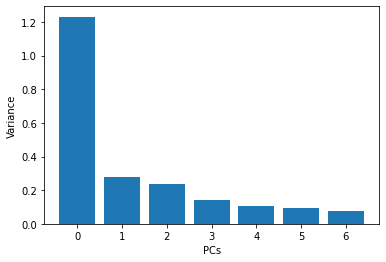

In [21]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [22]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6
0,1.508113,-0.256123,-0.802226,-0.446483,0.737136,0.242766,0.413673
1,1.600439,-0.251013,-0.763210,-0.235566,0.821861,0.234105,0.389854
2,1.597343,-0.253535,-0.759386,-0.260012,0.758297,0.288910,0.387579
3,-1.058427,-0.415375,-0.547625,0.350264,0.233833,-0.394451,0.075786
4,-1.044943,-0.199308,-0.276947,0.164498,0.390001,-0.308186,0.103611
...,...,...,...,...,...,...,...
38452,-1.114640,-0.162796,-0.239766,-0.082790,-0.309348,0.295629,-0.079616
38453,-1.133606,0.092671,-0.088247,-0.103191,-0.307800,0.282566,-0.086353
38454,-1.152571,0.348138,0.063272,-0.123591,-0.306252,0.269502,-0.093089
38455,-1.136034,0.672136,0.443313,-0.355932,-0.192034,0.401584,-0.085571


In [23]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,6,target
0,1.000000e+00,-1.560320e-14,4.542472e-16,1.849356e-15,2.369015e-15,1.944409e-15,-2.823182e-15,-0.136106
1,-1.560320e-14,1.000000e+00,6.315727e-16,8.126573e-16,-2.570209e-16,-5.324680e-16,-1.082616e-15,-0.042614
2,4.542472e-16,6.315727e-16,1.000000e+00,-8.524223e-16,8.574707e-16,4.892012e-16,-2.270584e-16,0.023781
3,1.849356e-15,8.126573e-16,-8.524223e-16,1.000000e+00,1.044981e-15,-7.431378e-16,-2.531583e-15,-0.030853
4,2.369015e-15,-2.570209e-16,8.574707e-16,1.044981e-15,1.000000e+00,-1.592036e-15,-1.752721e-15,-0.011597
5,1.944409e-15,-5.324680e-16,4.892012e-16,-7.431378e-16,-1.592036e-15,1.000000e+00,-9.473583e-16,-0.025825
6,-2.823182e-15,-1.082616e-15,-2.270584e-16,-2.531583e-15,-1.752721e-15,-9.473583e-16,1.000000e+00,0.020869
target,-1.361059e-01,-4.261390e-02,2.378145e-02,-3.085349e-02,-1.159678e-02,-2.582453e-02,2.086868e-02,1.000000


In [0]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

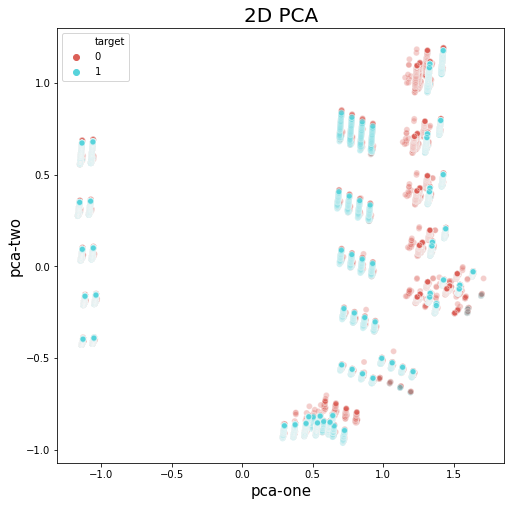

In [25]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

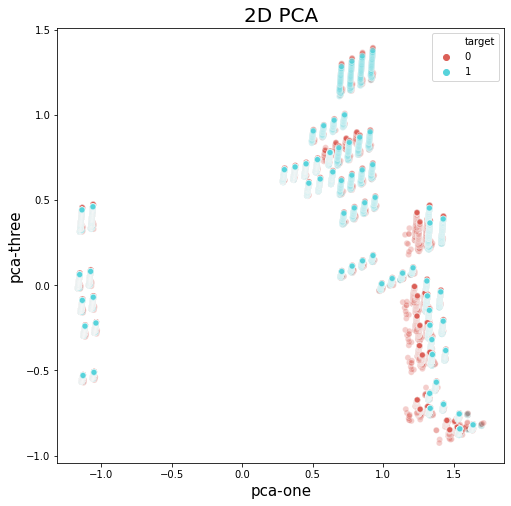

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

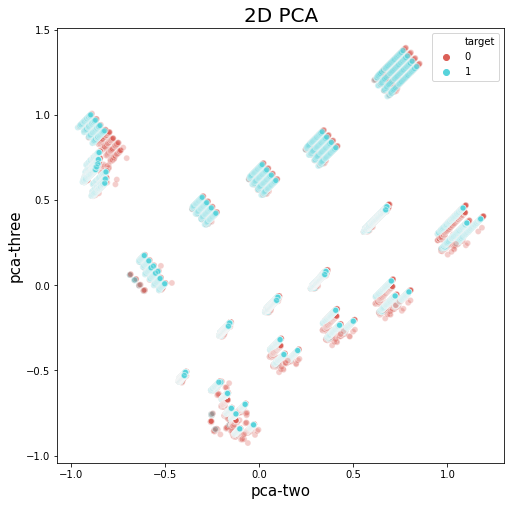

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

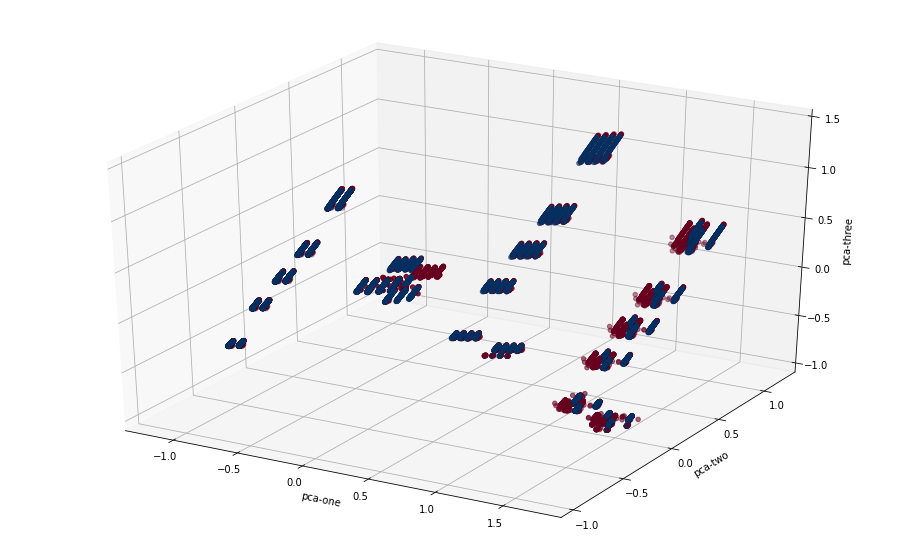

In [28]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

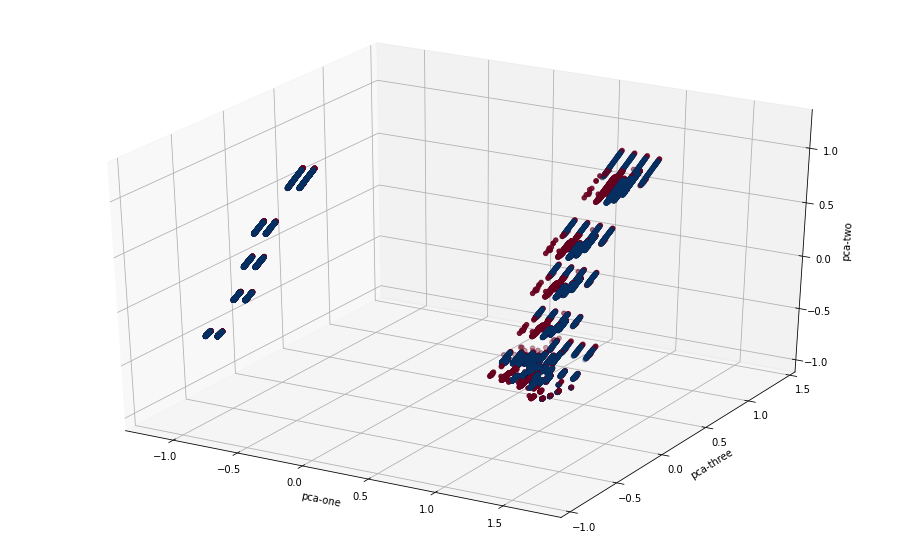

In [29]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

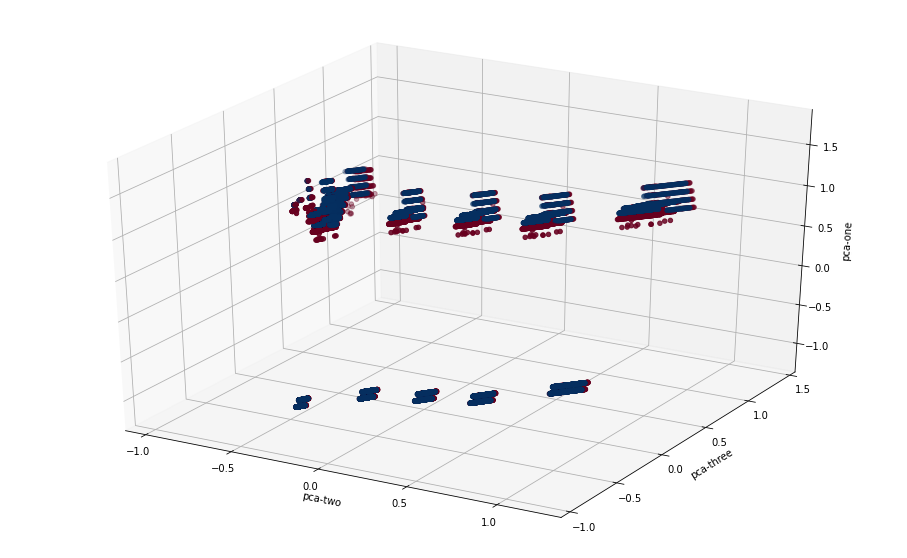

In [30]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [31]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 118.69903230667114 seconds


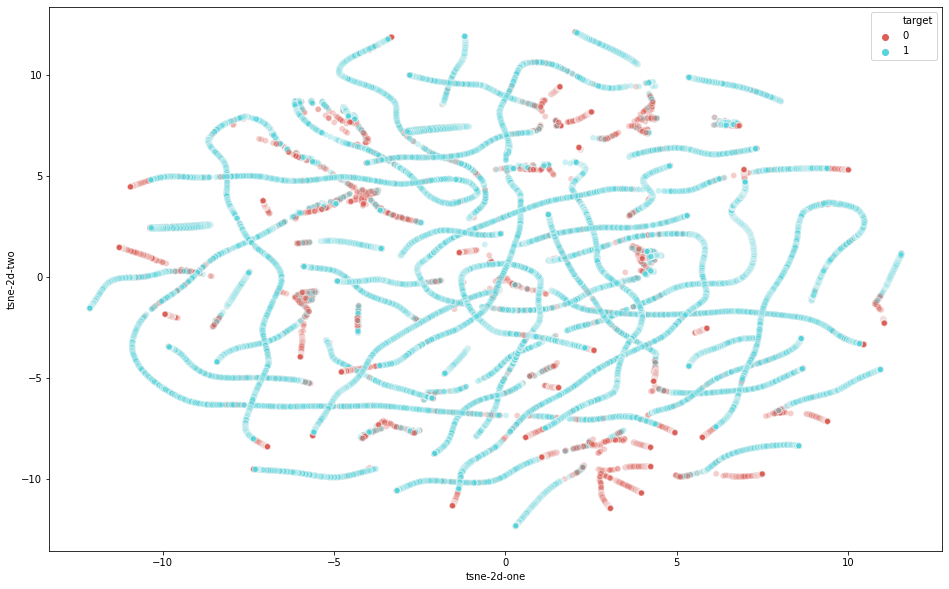

In [32]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

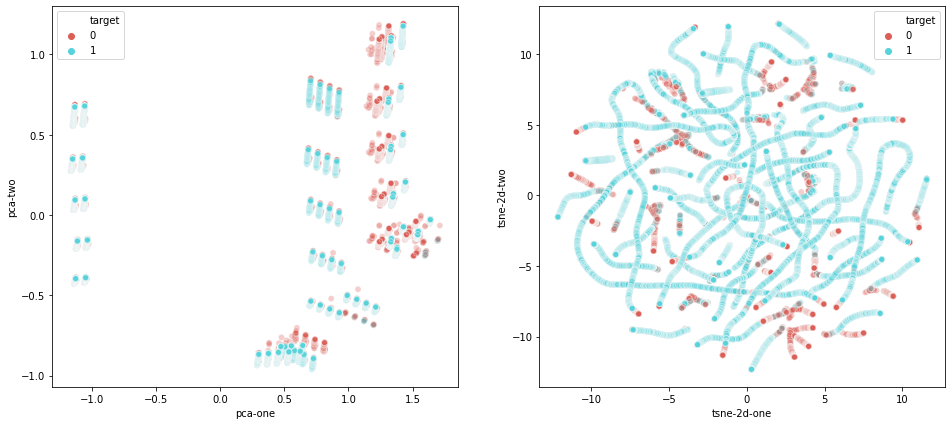

In [33]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [34]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 105.31535863876343 seconds


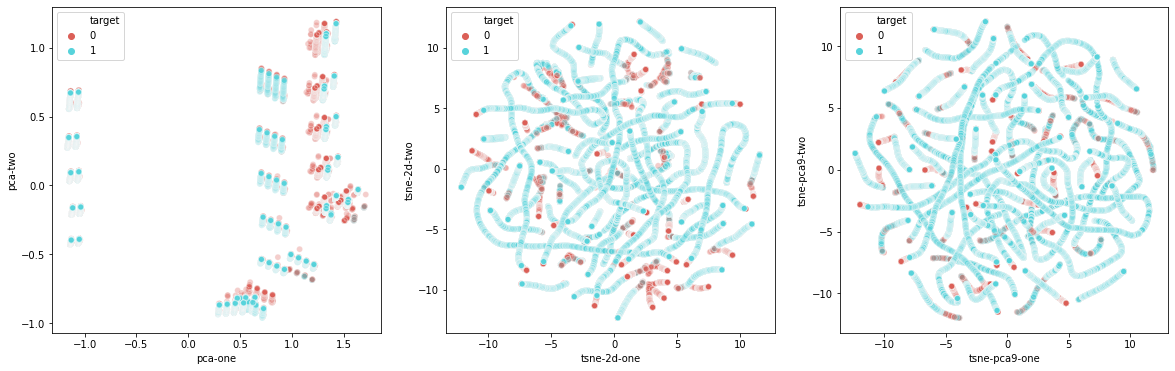

In [35]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [37]:
train_Y = df['target']
train_Y.value_counts()

1    22878
0    15579
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs       Score
16            max_packet_count  420.710330
7                       dst_ni  355.998919
5                         vnet  237.804089
17          packet_count_index  215.595210
24               vnet_vc_index  215.222825
14           packet_count_decr  210.626458
15           packet_count_incr  210.087283
8                   dst_router  199.878573
6                           vc  185.961844
18            packet_max_index  164.241739
0                      outport  120.933647
25            vnet_vc_cc_index   85.892401
19                  port_index   58.784413
1                       inport   43.765223
11                 current_hop   35.845883
23  cache_coherence_vnet_index   31.531159
9                 traversal_id   19.320874


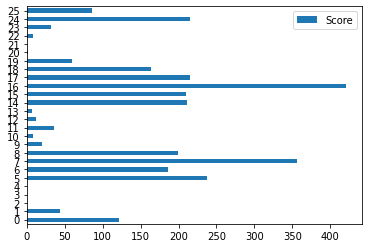

In [40]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [42]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.616176
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


                                     Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.087     
Dependent Variable:         target                   AIC:                      47436.5406
Date:                       2020-05-08 13:44         BIC:                      47624.8011
No. Observations:           38457                    Log-Likelihood:           -23696.   
Df Model:                   21                       LL-Null:                  -25959.   
Df Residuals:               38435                    LLR p-value:              0.0000    
Converged:                  0.0000                   Scale:                    1.0000    
No. Iterations:             35.0000                                                      
-----------------------------------------------------------------------------------------
                            Coef.    Std.Err.     z     P>|z|      [0.025       0.975]   
------------------------------------------------

In [43]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 67.56704046806435
Test Prediction  67.96671866874675


In [45]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,dst_ni,3.935588
11,current_hop,3.487856
17,packet_count_index,2.551995
0,outport,2.431916
18,packet_max_index,2.412554
12,hop_percentage,2.198093
8,dst_router,2.138196
19,port_index,1.259588
4,flit_type,0.957156
5,vnet,0.732765


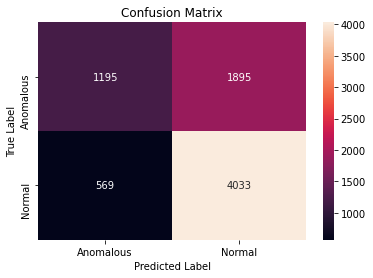

In [46]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.39      0.49      3090
           1       0.68      0.88      0.77      4602

    accuracy                           0.68      7692
   macro avg       0.68      0.63      0.63      7692
weighted avg       0.68      0.68      0.66      7692



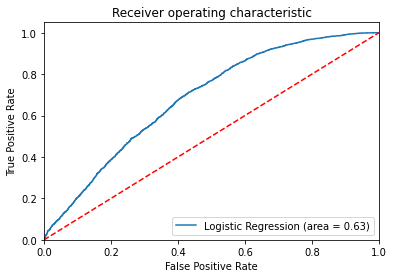

In [48]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [49]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [51]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 79.25889809848854
Test Prediction  69.40977639105564


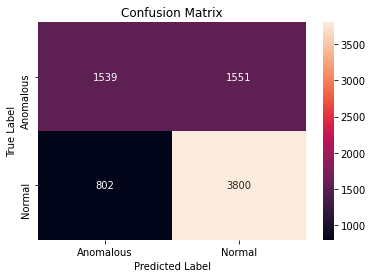

In [52]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [53]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.66      0.50      0.57      3090
           1       0.71      0.83      0.76      4602

    accuracy                           0.69      7692
   macro avg       0.68      0.66      0.67      7692
weighted avg       0.69      0.69      0.68      7692



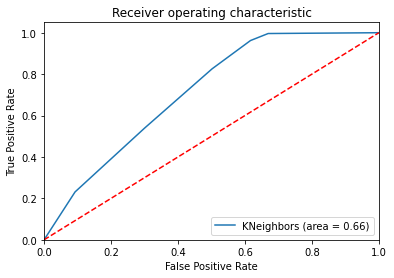

In [54]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [56]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [58]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 62.45083699008613
Test Prediction Score 63.260530421216856


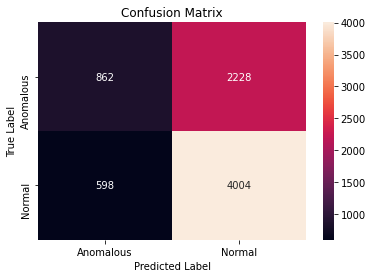

In [59]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [60]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.59      0.28      0.38      3090
           1       0.64      0.87      0.74      4602

    accuracy                           0.63      7692
   macro avg       0.62      0.57      0.56      7692
weighted avg       0.62      0.63      0.59      7692



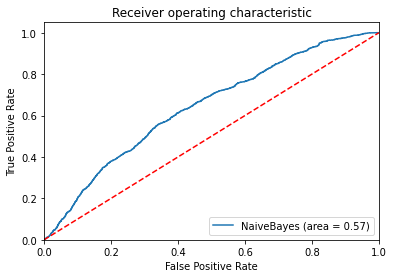

In [61]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [62]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [63]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 24612 samples, validate on 6153 samples
Epoch 1/10
24612/24612 [==============================] - 1s 46us/step - loss: 0.2437 - accuracy: 0.5933 - val_loss: 0.2361 - val_accuracy: 0.6197
Epoch 2/10
24612/24612 [==============================] - 1s 36us/step - loss: 0.2301 - accuracy: 0.6303 - val_loss: 0.2272 - val_accuracy: 0.6317
Epoch 3/10
24612/24612 [==============================] - 1s 35us/step - loss: 0.2241 - accuracy: 0.6409 - val_loss: 0.2233 - val_accuracy: 0.6433
Epoch 4/10
24612/24612 [==============================] - 1s 35us/step - loss: 0.2209 - accuracy: 0.6516 - val_loss: 0.2211 - val_accuracy: 0.6550
Epoch 5/10
24612/24612 [==============================] - 1s 35us/step - loss: 0.2187 - accuracy: 0.6578 - val_loss: 0.2191 - val_accuracy: 0.6628
Epoch 6/10
24612/24612 [==============================] - 1s 36us/step - loss: 0.2168 - accuracy: 0.6651 - val_loss: 0.2171 - val_accuracy: 0.6659
Epoch 7/10
24612/24612 [==============================] - 1s 35us/ste

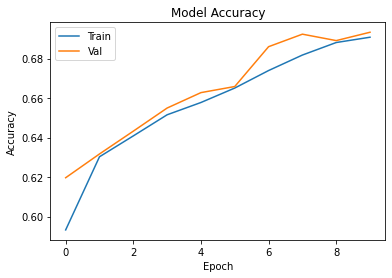

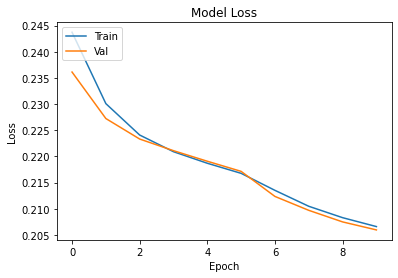

In [64]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [65]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.18%


3-Layer Neural Network

In [66]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 24612 samples, validate on 6153 samples
Epoch 1/15
24612/24612 [==============================] - 1s 37us/step - loss: 0.2451 - accuracy: 0.5939 - val_loss: 0.2424 - val_accuracy: 0.5939
Epoch 2/15
24612/24612 [==============================] - 1s 36us/step - loss: 0.2418 - accuracy: 0.5941 - val_loss: 0.2413 - val_accuracy: 0.5939
Epoch 3/15
24612/24612 [==============================] - 1s 36us/step - loss: 0.2413 - accuracy: 0.5941 - val_loss: 0.2411 - val_accuracy: 0.5939
Epoch 4/15
24612/24612 [==============================] - 1s 36us/step - loss: 0.2411 - accuracy: 0.5941 - val_loss: 0.2411 - val_accuracy: 0.5939
Epoch 5/15
24612/24612 [==============================] - 1s 36us/step - loss: 0.2411 - accuracy: 0.5941 - val_loss: 0.2411 - val_accuracy: 0.5939
Epoch 6/15
24612/24612 [==============================] - 1s 36us/step - loss: 0.2411 - accuracy: 0.5941 - val_loss: 0.2411 - val_accuracy: 0.5939
Epoch 7/15
24612/24612 [==============================] - 1s 36us/ste

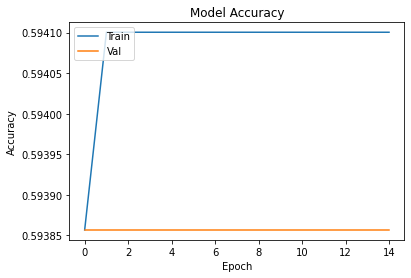

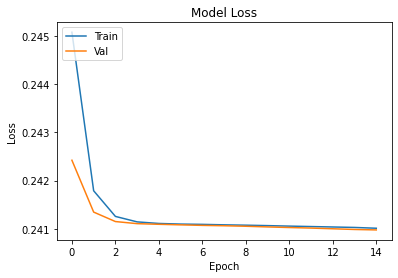

In [67]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [68]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 59.83%


4-Layer Neural Network



In [69]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 24612 samples, validate on 6153 samples
Epoch 1/30
24612/24612 [==============================] - 1s 39us/step - loss: 0.2391 - accuracy: 0.5941 - val_loss: 0.2387 - val_accuracy: 0.5939
Epoch 2/30
24612/24612 [==============================] - 1s 36us/step - loss: 0.2379 - accuracy: 0.5941 - val_loss: 0.2379 - val_accuracy: 0.5939
Epoch 3/30
24612/24612 [==============================] - 1s 37us/step - loss: 0.2371 - accuracy: 0.5941 - val_loss: 0.2373 - val_accuracy: 0.5939
Epoch 4/30
24612/24612 [==============================] - 1s 37us/step - loss: 0.2365 - accuracy: 0.5943 - val_loss: 0.2368 - val_accuracy: 0.5921
Epoch 5/30
24612/24612 [==============================] - 1s 37us/step - loss: 0.2359 - accuracy: 0.5938 - val_loss: 0.2364 - val_accuracy: 0.5922
Epoch 6/30
24612/24612 [==============================] - 1s 37us/step - loss: 0.2355 - accuracy: 0.5952 - val_loss: 0.2360 - val_accuracy: 0.5943
Epoch 7/30
24612/24612 [==============================] - 1s 37us/ste

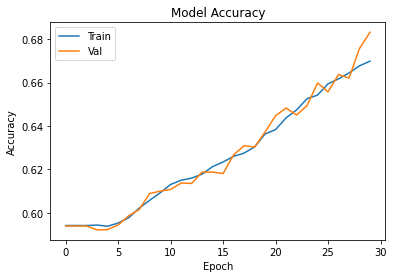

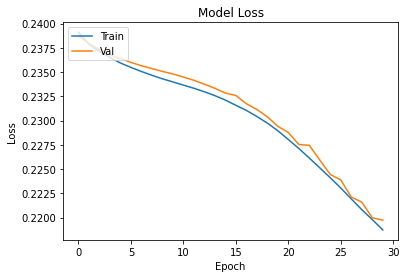

In [70]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [71]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 68.14%


5-Layer Neural Network Optimized

In [72]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 24612 samples, validate on 6153 samples
Epoch 1/100
24612/24612 [==============================] - 2s 86us/step - loss: 0.2187 - accuracy: 0.6549 - val_loss: 0.2107 - val_accuracy: 0.6766
Epoch 2/100
24612/24612 [==============================] - 2s 65us/step - loss: 0.2057 - accuracy: 0.6883 - val_loss: 0.2083 - val_accuracy: 0.6701
Epoch 3/100
24612/24612 [==============================] - 2s 65us/step - loss: 0.2008 - accuracy: 0.6984 - val_loss: 0.1913 - val_accuracy: 0.7052
Epoch 4/100
24612/24612 [==============================] - 2s 66us/step - loss: 0.1986 - accuracy: 0.7040 - val_loss: 0.2031 - val_accuracy: 0.6837
Epoch 5/100
24612/24612 [==============================] - 2s 66us/step - loss: 0.1960 - accuracy: 0.7106 - val_loss: 0.1899 - val_accuracy: 0.7275
Epoch 6/100
24612/24612 [==============================] - 2s 65us/step - loss: 0.1950 - accuracy: 0.7102 - val_loss: 0.1903 - val_accuracy: 0.7076
Epoch 7/100
24612/24612 [==============================] - 2s 6

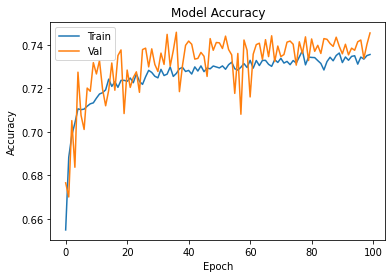

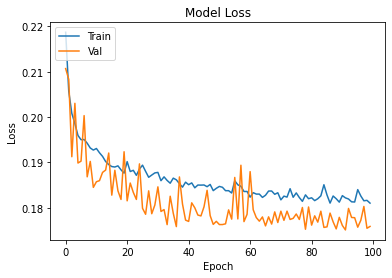

In [73]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [74]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.53%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [76]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 24, 'max_features': 24}
Accuracy : 0.7879408418657565


In [77]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [79]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 94.35722411831627
Test Prediction Score 84.4513780551222


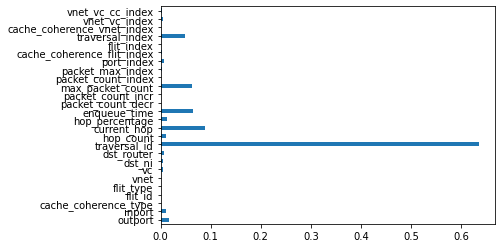

In [80]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

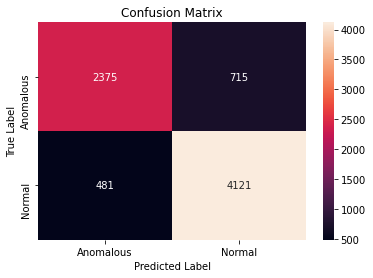

In [81]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [82]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      3090
           1       0.85      0.90      0.87      4602

    accuracy                           0.84      7692
   macro avg       0.84      0.83      0.84      7692
weighted avg       0.84      0.84      0.84      7692



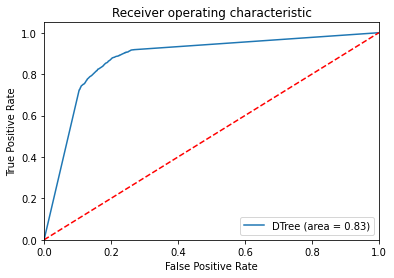

In [83]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250],
#            'max_features':range(0,25,2)}
#dt_g=RandomForestClassifier(random_state=42)
#dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
#dt_cv.fit(X_train,y_train)

#print("Best parameters:",dt_cv.best_params_)
#print("Accuracy :",dt_cv.best_score_)

In [86]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [88]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 97.56216479765968
Test Prediction Score 83.42433697347894


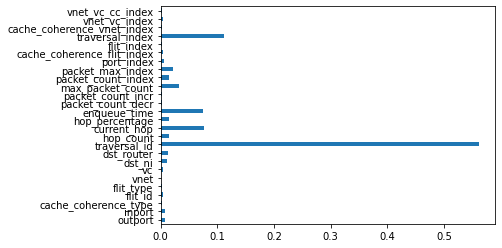

In [89]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

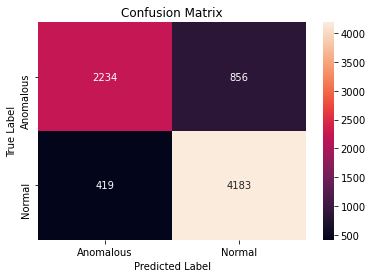

In [90]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [91]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78      3090
           1       0.83      0.91      0.87      4602

    accuracy                           0.83      7692
   macro avg       0.84      0.82      0.82      7692
weighted avg       0.83      0.83      0.83      7692



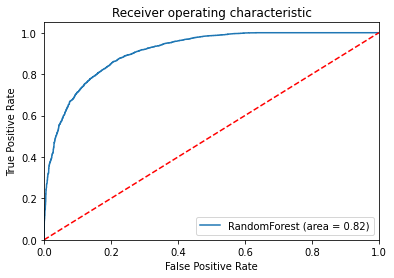

In [92]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250,500],
#           'min_child_weight':[1,3,6]}
#xgb_g=XGBClassifier(random_state=42)
#xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
#xgb_cv.fit(X_train,y_train)

#print("Best parameters:",xgb_cv.best_params_)
#print("Accuracy :",xgb_cv.best_score_)

In [97]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [99]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 98.67706809686332
Test Prediction Score 88.66354654186168


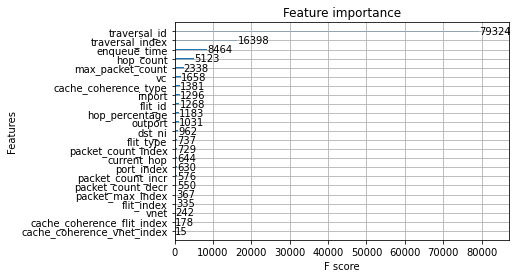

In [100]:
plot_importance(xgbc)
plt.show()

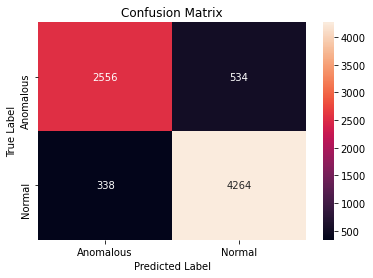

In [101]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [102]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      3090
           1       0.89      0.93      0.91      4602

    accuracy                           0.89      7692
   macro avg       0.89      0.88      0.88      7692
weighted avg       0.89      0.89      0.89      7692



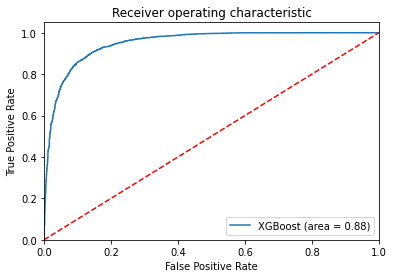

In [103]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
#param_grid = {'n_estimators': [x for x in range(24,40,2)],
#              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
#lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
#lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
#lgb_cv.fit(X_train, y_train)

#print("Best parameters:",lgb_cv.best_params_)
#print("Accuracy :",lgb_cv.best_score_)

In [106]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [108]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 83.37721436697547
Test Prediction Score 76.18304732189287


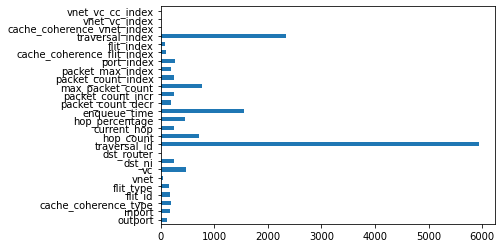

In [109]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

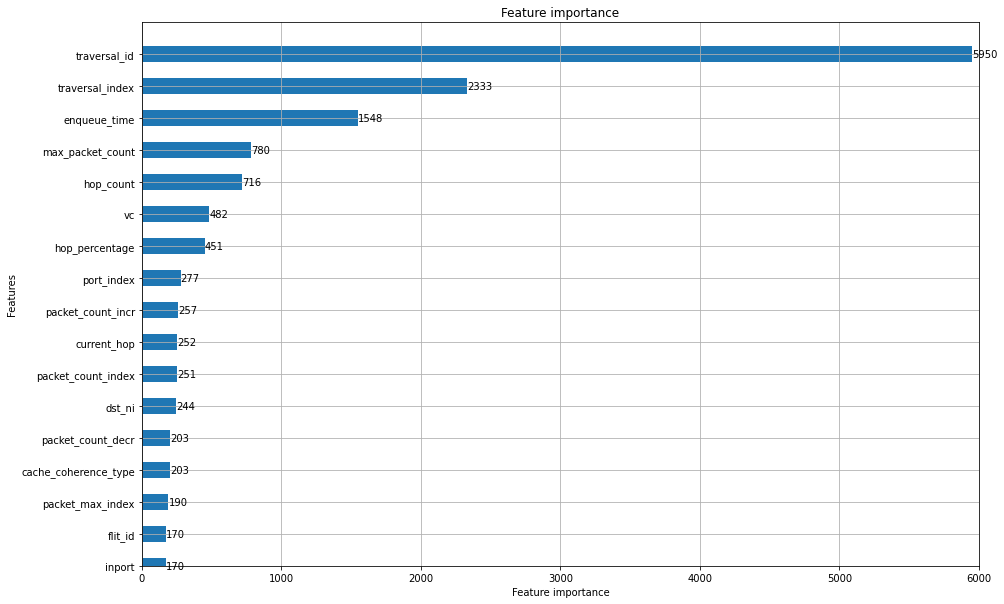

In [115]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6000), ylim = (0,17), figsize = (15,10))
plt.show()

In [111]:
sorted(gbm.feature_importances_,reverse=True)

[5950,
 2333,
 1548,
 780,
 716,
 482,
 451,
 277,
 257,
 252,
 251,
 244,
 203,
 203,
 190,
 170,
 170,
 154,
 122,
 97,
 85,
 53,
 12,
 0,
 0,
 0]

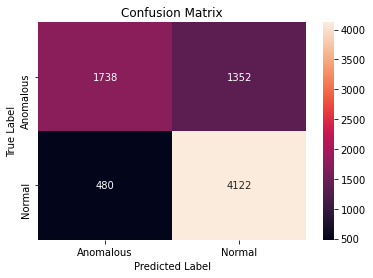

In [112]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [113]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.78      0.56      0.65      3090
           1       0.75      0.90      0.82      4602

    accuracy                           0.76      7692
   macro avg       0.77      0.73      0.74      7692
weighted avg       0.77      0.76      0.75      7692



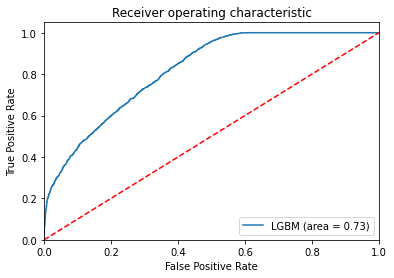

In [114]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()